In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("naukri_data_scientist.csv")
df.shape

(13691, 40)

In [3]:
df.head()


,ambitionBoxData/AggregateRating,ambitionBoxData/ReviewsCount,ambitionBoxData/Title,ambitionBoxData/Url,board,brandingTags/0/id,brandingTags/0/label,clientCareersUrl,clientGroupId,clientHeadline,...,location,logoPath,logoPathV3,mode,salary,showMultipleApply,smbJobFields/gender,tagsAndSkills,title,vacancy
0,2.0,9.0,Anurag Electronics Gujarat Reviews by Employees,https://www.ambitionbox.com/reviews/anurag-ele...,1,NaN,NaN,NaN,NaN,NaN,...,Mumbai,https://img.naukri.com/logo_images/v3/15620.gif,https://img.naukri.com/logo_images/v3/15620.gif,jp,12-15 Lacs PA,False,NaN,"Natural Language Processing,Phd,Deep Learning,...",Data Scientist - Phd only,5.0
1,3.8,38925.0,Capgemini Reviews by Employees,https://www.ambitionbox.com/reviews/capgemini-...,1,NaN,NaN,NaN,NaN,NaN,...,Bengaluru,https://img.naukimg.com/logo_images/groups/v1/...,https://img.naukimg.com/logo_images/groups/v1/...,jp,Not disclosed,False,NaN,"Data Science,Tensorflow,StatModel,SAS,Go,Rando...",Data Scientist,NaN
2,3.8,432.0,2COMS Reviews by Employees,https://www.ambitionbox.com/reviews/2coms-revi...,1,NaN,NaN,NaN,NaN,NaN,...,Bengaluru,https://img.naukimg.com/logo_images/groups/v1/...,https://img.naukimg.com/logo_images/groups/v1/...,jp,Not disclosed,False,NaN,"cuda,python,github,natural language processing...",Data Scientist // 3 yrs plus // Bangalore,NaN
3,4.3,3.0,P P Texofab Reviews by Employees,https://www.ambitionbox.com/reviews/p-p-texofa...,1,NaN,NaN,NaN,NaN,NaN,...,Noida,https://img.naukimg.com/logo_images/groups/v1/...,https://img.naukimg.com/logo_images/groups/v1/...,jp,2.5-3.5 Lacs PA,False,NaN,"Tensorflow,Pytorch,Python,Pandas,EDA Tools,Ker...",AI Engineer and Data Scientist Intern,NaN
4,3.3,299.0,Aeries Technology Reviews by Employees,https://www.ambitionbox.com/reviews/aeries-tec...,1,NaN,NaN,NaN,NaN,NaN,...,Remote,https://img.naukri.com/logo_images/v3/1667996.gif,https://img.naukri.com/logo_images/v3/1667996.gif,jp,10-12 Lacs PA,False,NaN,"Data science,data scientist,LLM,Science,Data",Data Scientist (PhD),NaN


In [4]:
df[["jobId", "createdDate", "title", "tagsAndSkills"]].head()


,jobId,createdDate,title,tagsAndSkills
0,10421006391,2024-12-23 06:51:32,Data Scientist - Phd only,"Natural Language Processing,Phd,Deep Learning,..."
1,231224903546,2024-12-23 06:33:58,Data Scientist,"Data Science,Tensorflow,StatModel,SAS,Go,Rando..."
2,231224006929,2024-12-23 09:29:16,Data Scientist // 3 yrs plus // Bangalore,"cuda,python,github,natural language processing..."
3,181224005802,2024-12-18 06:01:38,AI Engineer and Data Scientist Intern,"Tensorflow,Pytorch,Python,Pandas,EDA Tools,Ker..."
4,171224014541,2024-12-17 11:10:03,Data Scientist (PhD),"Data science,data scientist,LLM,Science,Data"


In [5]:
df["year"] = pd.to_datetime(df["createdDate"], errors="coerce").dt.year
df[["createdDate", "year"]].head()

,createdDate,year
0,2024-12-23 06:51:32,2024
1,2024-12-23 06:33:58,2024
2,2024-12-23 09:29:16,2024
3,2024-12-18 06:01:38,2024
4,2024-12-17 11:10:03,2024


In [6]:
df["skill"] = df["tagsAndSkills"].str.lower().str.split(",")

skills_df = df[["jobId", "year", "skill"]].explode("skill")
skills_df["skill"] = skills_df["skill"].str.strip()

skills_df.head()


,jobId,year,skill
0,10421006391,2024,natural language processing
0,10421006391,2024,phd
0,10421006391,2024,deep learning
0,10421006391,2024,data science
0,10421006391,2024,languages


In [7]:
generic = {
    "data", "science", "data science", "data scientist", "analysis",
    "analytics", "languages", "tools", "production"
}

skills_df = skills_df[~skills_df["skill"].isin(generic)]
skills_df.head()

,jobId,year,skill
0,10421006391,2024,natural language processing
0,10421006391,2024,phd
0,10421006391,2024,deep learning
0,10421006391,2024,processing
1,231224903546,2024,tensorflow


In [8]:
stop_skills = {
    "data", "science", "processing", "analysis", "analytics",
    "tools", "languages", "production"
}

skills_df = skills_df[~skills_df["skill"].isin(stop_skills)]
skills_df = skills_df[skills_df["skill"].str.len() > 2]

In [9]:
# quitar skills vacías o muy cortas
skills_df = skills_df[skills_df["skill"].str.len() > 2]

# lista mínima de ruido común
noise = {
    "data", "science", "processing", "analysis", "analytical",
    "tools", "production", "languages"
}

skills_df = skills_df[~skills_df["skill"].isin(noise)]

# quitar duplicados por job y año
skills_df = skills_df.drop_duplicates(subset=["jobId", "year", "skill"])


In [10]:
skills_df["skill"].value_counts().head(20)


skill
python                2571
machine learning      2562
sql                   2281
data analysis         2089
agile                 1248
data modeling         1220
computer science      1087
business analysis     1043
data engineering      1012
project management     960
automation             954
data quality           943
business analyst       916
data management        782
aws                    775
data processing        768
coding                 739
gcp                    728
data warehousing       655
pyspark                644
Name: count, dtype: int64

In [11]:
# eliminar skills vacías o muy cortas
skills_df = skills_df.dropna(subset=["skill"])
skills_df = skills_df[skills_df["skill"].str.len() > 2]

# normalización básica
skills_df["skill"] = skills_df["skill"].str.lower()
skills_df["skill"] = skills_df["skill"].str.strip()

# eliminar duplicados exactos
skills_df = skills_df.drop_duplicates(subset=["jobId", "year", "skill"])

In [12]:
# 1) limpiar nulos y skills cortas
skills_df = skills_df.dropna(subset=["skill"])
skills_df["skill"] = skills_df["skill"].astype(str).str.strip().str.lower()
skills_df = skills_df[skills_df["skill"].str.len() > 2]

# 2) sacar ruido / términos genéricos (NO quedártelos)
noise = {
    "data", "science", "processing", "analysis", "analytics", "analytical",
    "tools", "languages", "production"
}
skills_df = skills_df[~skills_df["skill"].isin(noise)]

# 3) deduplicar por job y año
skills_df = skills_df.drop_duplicates(subset=["jobId", "year", "skill"])

# 4) check rápido
skills_df["skill"].value_counts().head(20)

skill
python                2571
machine learning      2562
sql                   2281
data analysis         2089
agile                 1248
data modeling         1220
computer science      1087
business analysis     1043
data engineering      1012
project management     960
automation             954
data quality           943
business analyst       916
data management        782
aws                    775
data processing        768
coding                 739
gcp                    728
data warehousing       655
pyspark                644
Name: count, dtype: int64

In [13]:
# frecuencia de skills por año
skill_year = (
    skills_df
    .groupby(["year", "skill"])
    .size()
    .reset_index(name="count")
)

skill_year.head()

,year,skill,count
0,2015,analytical skills,3
1,2015,attention to detail,1
2,2015,bidding,4
3,2015,business analysis,5
4,2015,business analyst,8


In [14]:
# contar skills por año
trend_df = (
    skills_df
    .groupby(["year", "skill"])
    .size()
    .reset_index(name="count")
)

trend_df.head()

,year,skill,count
0,2015,analytical skills,3
1,2015,attention to detail,1
2,2015,bidding,4
3,2015,business analysis,5
4,2015,business analyst,8


In [15]:
# quedarnos con skills con volumen suficiente
trend_df = trend_df[trend_df["count"] >= 20]

In [16]:
skill_year_counts = (
    skills_df
    .groupby(["year", "skill"])
    .size()
    .reset_index(name="count")
)

In [17]:
skill_year_counts["year"].min(), skill_year_counts["year"].max()

(2015, 2024)

In [18]:
skill_year_counts = (
    skills_df
    .groupby(["year", "skill"])
    .size()
    .reset_index(name="count")
)

In [19]:
skill_year_counts["year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int32)

In [20]:
skill_year_counts.head()

,year,skill,count
0,2015,analytical skills,3
1,2015,attention to detail,1
2,2015,bidding,4
3,2015,business analysis,5
4,2015,business analyst,8


In [21]:
# total por skill en todo el período
total_by_skill = (
    skills_df
    .groupby("skill")
    .size()
    .reset_index(name="total_count")
)

# total por año y skill (ya lo tenés, lo rehacemos limpio)
skill_year_counts = (
    skills_df
    .groupby(["year", "skill"])
    .size()
    .reset_index(name="count")
)

# unir para calcular proporción anual
skill_year = skill_year_counts.merge(total_by_skill, on="skill", how="left")

# peso relativo por año
skill_year["share"] = skill_year["count"] / skill_year["total_count"]

skill_year.head()

,year,skill,count,total_count,share
0,2015,analytical skills,3,262,0.011450
1,2015,attention to detail,1,2,0.500000
2,2015,bidding,4,36,0.111111
3,2015,business analysis,5,1043,0.004794
4,2015,business analyst,8,916,0.008734


In [22]:
# crecimiento por skill entre primer y último año
growth = (
    skill_year_counts
    .sort_values(["skill", "year"])
    .groupby("skill")
    .agg(
        first_year=("year", "min"),
        last_year=("year", "max"),
        first_count=("count", "first"),
        last_count=("count", "last")
    )
    .reset_index()
)

# evitar ruido: skills con muy poca base
growth = growth[growth["first_count"] >= 20]

# crecimiento absoluto y relativo
growth["abs_growth"] = growth["last_count"] - growth["first_count"]
growth["rel_growth"] = growth["last_count"] / growth["first_count"]

# top skills en crecimiento
growth.sort_values("rel_growth", ascending=False).head(20)

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth
80,adf,2024,2024,41,41,0,1.0
195,aiml,2024,2024,65,65,0,1.0
198,airflow,2024,2024,160,160,0,1.0
244,analog,2024,2024,20,20,0,1.0
305,angular,2024,2024,26,26,0,1.0
334,apache pig,2024,2024,24,24,0,1.0
342,api,2024,2024,48,48,0,1.0
543,aws glue,2024,2024,51,51,0,1.0
549,aws lambda,2024,2024,33,33,0,1.0
555,aws sagemaker,2024,2024,30,30,0,1.0


In [23]:
# 1) quedarnos solo con 2020–2024
post_2020 = skill_year_counts[skill_year_counts["year"] >= 2020]

# 2) primer y último año dentro del rango 2020–2024
growth_2020 = (
    post_2020
    .sort_values(["skill", "year"])
    .groupby("skill")
    .agg(
        first_year=("year", "min"),
        last_year=("year", "max"),
        first_count=("count", "first"),
        last_count=("count", "last"),
    )
    .reset_index()
)

# 3) métricas de crecimiento
growth_2020["abs_growth"] = growth_2020["last_count"] - growth_2020["first_count"]
growth_2020["rel_growth"] = growth_2020["last_count"] / growth_2020["first_count"]

# 4) ver skills que realmente crecieron post-2020
growth_2020.sort_values("abs_growth", ascending=False).head(20)

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth
4788,python,2020,2024,9,2421,2412,269.000000
3578,machine learning,2020,2024,23,2162,2139,94.000000
5673,sql,2020,2024,10,2031,2021,203.100000
1612,data analysis,2020,2024,12,1817,1805,151.416667
1727,data modeling,2020,2024,8,1059,1051,132.375000
129,agile,2020,2024,4,1008,1004,252.000000
1668,data engineering,2020,2024,1,961,960,961.000000
1322,computer science,2020,2024,15,892,877,59.466667
473,automation,2020,2024,3,831,828,277.000000
1764,data quality,2020,2024,4,820,816,205.000000


In [24]:
locals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', 'json', 'sys', '__import__', 'islice', 'collections', 'NamespaceMagics', '_jupyterlab_variableinspector_nms', '_jupyterlab_variableinspector_Jupyter', '_jupyterlab_variableinspector_maxitems', '__np', '__pd', '__pyspark', '__tf', '__K', '__torch', '__ipywidgets', '__xr', '_attempt_import', '_check_imported', '_jupyterlab_variableinspector_changesettings', '_jupyterlab_variableinspector_getsizeof', '_jupyterlab_variableinspector_getshapeof', '_jupyterlab_variableinspector_getcontentof', '_jupyterlab_variableinspector_is_matrix', '_jupyterlab_variableinspector_is_widget', '_jupyterlab_variableinspector_dict_list', '_jupyterlab_variableinspector_getmatrixcontent', '_jupyterlab_variableinspector_displaywidget', '_jupyterlab_variableinspector_default', '_jupyterlab_variableinspector

In [25]:
growth_2020.sort_values("abs_growth", ascending=False).head(20)

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth
4788,python,2020,2024,9,2421,2412,269.000000
3578,machine learning,2020,2024,23,2162,2139,94.000000
5673,sql,2020,2024,10,2031,2021,203.100000
1612,data analysis,2020,2024,12,1817,1805,151.416667
1727,data modeling,2020,2024,8,1059,1051,132.375000
129,agile,2020,2024,4,1008,1004,252.000000
1668,data engineering,2020,2024,1,961,960,961.000000
1322,computer science,2020,2024,15,892,877,59.466667
473,automation,2020,2024,3,831,828,277.000000
1764,data quality,2020,2024,4,820,816,205.000000


In [26]:
growth_2020.sort_values("rel_growth", ascending=False).head(20)

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth
1668,data engineering,2020,2024,1,961,960,961.0
497,aws,2020,2024,1,708,707,708.0
2660,gcp,2020,2024,1,637,636,637.0
1840,data warehousing,2020,2024,1,570,569,570.0
5296,scala,2020,2024,1,490,489,490.0
3104,information technology,2020,2024,1,475,474,475.0
2873,healthcare,2020,2024,1,432,431,432.0
2352,etl,2021,2024,1,420,419,420.0
4205,oracle,2020,2024,1,392,391,392.0
1829,data visualization,2020,2024,1,377,376,377.0


In [27]:
# elegir skills top por crecimiento (usamos abs_growth)
top_skills = growth_2020.sort_values("abs_growth", ascending=False).head(10)["skill"]

# filtrar serie temporal solo para esas skills
trend_top = skill_year_counts[
    skill_year_counts["skill"].isin(top_skills)
]

trend_top.head()

,year,skill,count
46,2016,automation,1
56,2016,computer science,1
152,2017,agile,1
165,2017,automation,4
213,2017,computer science,2


In [28]:
# seleccionar skills top (las que ya viste crecer fuerte)
top_skills = [
    "python", "machine learning", "sql", "data analysis",
    "data engineering", "aws", "gcp", "data warehousing",
    "automation", "artificial intelligence"
]

# filtrar rango temporal y skills
ts = skill_year_counts[
    (skill_year_counts["year"] >= 2020) &
    (skill_year_counts["skill"].isin(top_skills))
]

# pivot para serie temporal
ts_pivot = ts.pivot(index="year", columns="skill", values="count").fillna(0)

ts_pivot

skill,artificial intelligence,automation,aws,data analysis,data engineering,data warehousing,gcp,machine learning,python,sql
year,,,,,,,,,,
2020,5,3,1,12,1,1,1,23,9,10
2021,5,5,6,11,2,6,2,27,12,7
2022,18,22,13,54,11,12,24,106,26,45
2023,33,85,46,171,35,63,62,220,94,179
2024,563,831,708,1817,961,570,637,2162,2421,2031


In [29]:
pivot_2020_2024 = (
    skills_df
    .query("year >= 2020")
    .groupby(["year", "skill"])
    .size()
    .unstack(fill_value=0)
    [[
        "python", "machine learning", "sql", "data analysis",
        "data engineering", "aws", "gcp",
        "data warehousing", "artificial intelligence"
    ]]
)

In [30]:
# CAGR 2020–2024 por skill
years = 2024 - 2020

cagr_df = growth_2020.copy()
cagr_df["cagr"] = (cagr_df["last_count"] / cagr_df["first_count"]) ** (1/years) - 1

cagr_df.sort_values("cagr", ascending=False).head(20)

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth,cagr
1668,data engineering,2020,2024,1,961,960,961.0,4.567764
497,aws,2020,2024,1,708,707,708.0,4.158320
2660,gcp,2020,2024,1,637,636,637.0,4.023829
1840,data warehousing,2020,2024,1,570,569,570.0,3.886172
5296,scala,2020,2024,1,490,489,490.0,3.704885
3104,information technology,2020,2024,1,475,474,475.0,3.668457
2873,healthcare,2020,2024,1,432,431,432.0,3.559014
2352,etl,2021,2024,1,420,419,420.0,3.527019
4205,oracle,2020,2024,1,392,391,392.0,3.449606
1829,data visualization,2020,2024,1,377,376,377.0,3.406414


In [31]:
# total de postings por año
total_year = skills_df.groupby("year").size().reset_index(name="total")

# conteo por skill y año
skill_year = skills_df.groupby(["year", "skill"]).size().reset_index(name="count")

# merge + share
skill_year = skill_year.merge(total_year, on="year")
skill_year["share"] = skill_year["count"] / skill_year["total"]

skill_year.head()

,year,skill,count,total,share
0,2015,analytical skills,3,63,0.047619
1,2015,attention to detail,1,63,0.015873
2,2015,bidding,4,63,0.063492
3,2015,business analysis,5,63,0.079365
4,2015,business analyst,8,63,0.126984


In [32]:
# CAGR 2020–2024 por skill (robusto)
import numpy as np
import pandas as pd

# 1) evitar división por 0 y años faltantes
base = pivot_2020_2024.copy()
base = base.reindex([2020, 2024])  # asegura filas 2020 y 2024 (si faltan, queda NaN)

# 2) calcular CAGR por columna (skill)
cagr = (base.loc[2024] / base.loc[2020]).replace([np.inf, -np.inf], np.nan)
cagr = (cagr ** (1/4)) - 1

cagr_df = (
    cagr
    .dropna()
    .reset_index()
    .rename(columns={"index": "skill", 0: "cagr"})
    .sort_values("cagr", ascending=False)
)

cagr_df.head(20)

,skill,cagr
4,data engineering,4.567764
5,aws,4.158320
6,gcp,4.023829
7,data warehousing,3.886172
0,python,3.049842
2,sql,2.775091
3,data analysis,2.507869
8,artificial intelligence,2.257501
1,machine learning,2.113737


In [33]:
# Next: export your key tables (for Datafolio + reproducibility)

pivot_2020_2024.to_csv("pivot_2020_2024.csv")          # trends table
growth_2020.to_csv("growth_2020_2024.csv", index=False) # growth summary
cagr_df.to_csv("cagr_2020_2024.csv", index=False)       # CAGR ranking

In [34]:
cagr_df

,skill,cagr
4,data engineering,4.567764
5,aws,4.158320
6,gcp,4.023829
7,data warehousing,3.886172
0,python,3.049842
2,sql,2.775091
3,data analysis,2.507869
8,artificial intelligence,2.257501
1,machine learning,2.113737


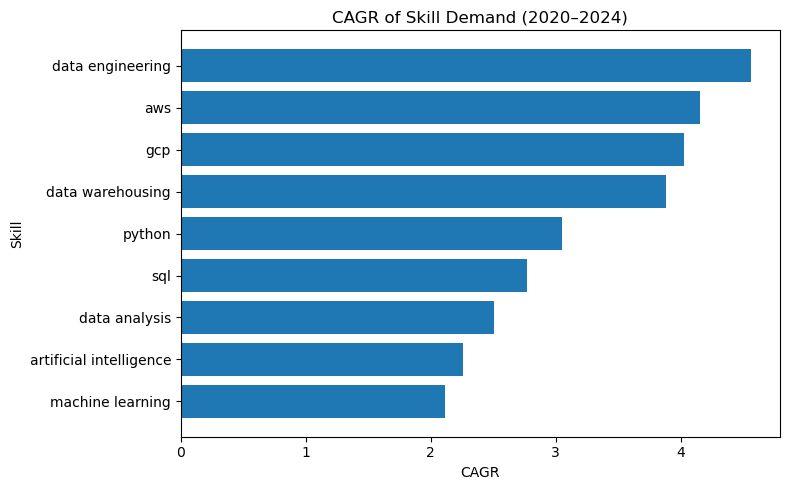

In [35]:
import matplotlib.pyplot as plt

cagr_df_sorted = cagr_df.sort_values("cagr", ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(cagr_df_sorted["skill"], cagr_df_sorted["cagr"])
plt.title("CAGR of Skill Demand (2020–2024)")
plt.xlabel("CAGR")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

In [36]:
# skills con presencia en al menos 3 años distintos desde 2020
stable_skills = (
    skill_year_counts
    .query("year >= 2020")
    .groupby("skill")["year"]
    .nunique()
    .reset_index(name="years_present")
)

stable_skills = stable_skills[stable_skills["years_present"] >= 3]

stable_skills.head()

,skill,years_present
24,ab initio,3
42,access management,3
44,account management,3
47,accounting,4
59,acquisition,3


In [37]:
# cruzar con CAGR para quedarnos solo con skills estables + crecientes
cagr_stable = cagr_df.merge(stable_skills, on="skill", how="inner") \
                     .sort_values("cagr", ascending=False)

cagr_stable

,skill,cagr,years_present
0,data engineering,4.567764,5
1,aws,4.158320,5
2,gcp,4.023829,5
3,data warehousing,3.886172,5
4,python,3.049842,5
5,sql,2.775091,5
6,data analysis,2.507869,5
7,artificial intelligence,2.257501,5
8,machine learning,2.113737,5


In [38]:
final_skills = growth_2020.merge(
    cagr_df,
    on="skill",
    how="inner"
)

In [39]:
final_skills = final_skills[final_skills["last_count"] >= 200]

In [40]:
final_skills.sort_values("cagr", ascending=False)

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth,cagr
3,data engineering,2020,2024,1,961,960,961.000000,4.567764
1,aws,2020,2024,1,708,707,708.000000,4.158320
5,gcp,2020,2024,1,637,636,637.000000,4.023829
4,data warehousing,2020,2024,1,570,569,570.000000,3.886172
7,python,2020,2024,9,2421,2412,269.000000,3.049842
8,sql,2020,2024,10,2031,2021,203.100000,2.775091
2,data analysis,2020,2024,12,1817,1805,151.416667,2.507869
0,artificial intelligence,2020,2024,5,563,558,112.600000,2.257501
6,machine learning,2020,2024,23,2162,2139,94.000000,2.113737


In [41]:
# 1) asegurar que growth_2020 tenga cagr (merge por skill)
growth_2020 = growth_2020.merge(cagr_df, on="skill", how="left")

# 2) ahora sí, tu clasificación
def classify_skill(row):
    if row["first_year"] >= 2020 and row["last_count"] >= 500 and row["cagr"] >= 3:
        return "Emerging Core"
    elif row["last_count"] >= 1000:
        return "Core"
    else:
        return "Niche / Supporting"

growth_2020["category"] = growth_2020.apply(classify_skill, axis=1)

growth_2020[["skill","category","first_year","last_year","first_count","last_count","abs_growth","rel_growth","cagr"]]\
    .sort_values(["category","cagr","last_count"], ascending=[True, False, False])\
    .head(30)

,skill,category,first_year,last_year,first_count,last_count,abs_growth,rel_growth,cagr
5673,sql,Core,2020,2024,10,2031,2021,203.100000,2.775091
1612,data analysis,Core,2020,2024,12,1817,1805,151.416667,2.507869
3578,machine learning,Core,2020,2024,23,2162,2139,94.000000,2.113737
1727,data modeling,Core,2020,2024,8,1059,1051,132.375000,NaN
129,agile,Core,2020,2024,4,1008,1004,252.000000,NaN
1668,data engineering,Emerging Core,2020,2024,1,961,960,961.000000,4.567764
497,aws,Emerging Core,2020,2024,1,708,707,708.000000,4.158320
2660,gcp,Emerging Core,2020,2024,1,637,636,637.000000,4.023829
1840,data warehousing,Emerging Core,2020,2024,1,570,569,570.000000,3.886172
4788,python,Emerging Core,2020,2024,9,2421,2412,269.000000,3.049842


In [42]:
# 1) quedarnos solo con skills que tengan datos completos 2020–2024
cagr_clean = growth_2020.dropna(subset=["cagr"]).copy()

# 2) (opcional pero recomendable) filtrar por masa mínima en 2024
cagr_clean = cagr_clean[cagr_clean["last_count"] >= 200]

# 3) ordenar por CAGR
cagr_clean = cagr_clean.sort_values("cagr", ascending=False)

cagr_clean[["skill", "first_year", "last_year", "last_count", "cagr"]]

,skill,first_year,last_year,last_count,cagr
1668,data engineering,2020,2024,961,4.567764
497,aws,2020,2024,708,4.158320
2660,gcp,2020,2024,637,4.023829
1840,data warehousing,2020,2024,570,3.886172
4788,python,2020,2024,2421,3.049842
5673,sql,2020,2024,2031,2.775091
1612,data analysis,2020,2024,1817,2.507869
398,artificial intelligence,2020,2024,563,2.257501
3578,machine learning,2020,2024,2162,2.113737


In [43]:
def classify_skill(row):
    if row["last_count"] >= 1000 and row["cagr"] >= 3:
        return "Emerging Core"
    elif row["last_count"] >= 1000:
        return "Core"
    elif row["cagr"] >= 3:
        return "Fast Emerging"
    else:
        return "Supporting / Niche"

cagr_clean["category"] = cagr_clean.apply(classify_skill, axis=1)

cagr_clean.sort_values(["category", "cagr"], ascending=[True, False])

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth,cagr,category
5673,sql,2020,2024,10,2031,2021,203.100000,2.775091,Core
1612,data analysis,2020,2024,12,1817,1805,151.416667,2.507869,Core
3578,machine learning,2020,2024,23,2162,2139,94.000000,2.113737,Core
4788,python,2020,2024,9,2421,2412,269.000000,3.049842,Emerging Core
1668,data engineering,2020,2024,1,961,960,961.000000,4.567764,Fast Emerging
497,aws,2020,2024,1,708,707,708.000000,4.158320,Fast Emerging
2660,gcp,2020,2024,1,637,636,637.000000,4.023829,Fast Emerging
1840,data warehousing,2020,2024,1,570,569,570.000000,3.886172,Fast Emerging
398,artificial intelligence,2020,2024,5,563,558,112.600000,2.257501,Supporting / Niche


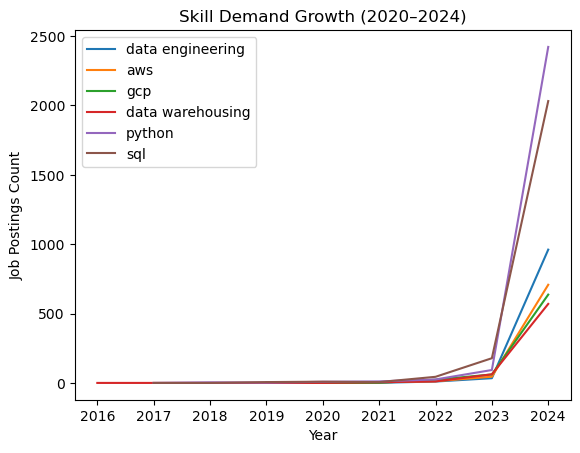

In [44]:
import matplotlib.pyplot as plt

skills_to_plot = [
    "data engineering", "aws", "gcp", "data warehousing", "python", "sql"
]

plot_df = (
    skills_df[skills_df["skill"].isin(skills_to_plot)]
    .groupby(["year", "skill"])
    .size()
    .reset_index(name="count")
)

for skill in skills_to_plot:
    tmp = plot_df[plot_df["skill"] == skill]
    plt.plot(tmp["year"], tmp["count"], label=skill)

plt.legend()
plt.title("Skill Demand Growth (2020–2024)")
plt.xlabel("Year")
plt.ylabel("Job Postings Count")
plt.show()

In [45]:
# volatilidad de demanda por skill (2020–2024)

volatility = (
    pivot_2020_2024
    .agg(["mean", "std"])
    .T
    .reset_index()
    .rename(columns={"index": "skill"})
)

volatility["cv"] = volatility["std"] / volatility["mean"]

volatility.sort_values("cv", ascending=False)

,skill,mean,std,cv
4,data engineering,202.0,424.515017,2.101559
0,python,512.4,1067.498150,2.083330
5,aws,154.8,309.746186,2.000944
8,artificial intelligence,124.8,245.232950,1.965008
2,sql,454.4,884.135058,1.945720
3,data analysis,413.0,787.569997,1.906949
6,gcp,145.2,276.033875,1.901060
7,data warehousing,130.4,246.996559,1.894145
1,machine learning,507.6,928.284601,1.828772


In [46]:
out_path = "outputs_skills_labour_market.xlsx"

with pd.ExcelWriter(out_path, engine="openpyxl") as writer:
    skills_df.to_excel(writer, sheet_name="skills_long", index=False)
    skill_year_counts.to_excel(writer, sheet_name="skill_year_counts", index=False)
    pivot_2020_2024.to_excel(writer, sheet_name="pivot_2020_2024")
    growth_2020.to_excel(writer, sheet_name="growth_2020", index=False)
    cagr_df.to_excel(writer, sheet_name="cagr_2020_2024", index=False)
    volatility.sort_values("cv", ascending=False).to_excel(writer, sheet_name="volatility", index=False)

out_path

'outputs_skills_labour_market.xlsx'

In [47]:
strategic_skills = (
    growth_2020
    .merge(
        volatility[["skill", "cv"]],
        on="skill",
        how="left"
    )
    .sort_values(
        by=["category", "cagr", "cv"],
        ascending=[True, False, False]
    )
)

strategic_skills[[
    "skill", "category", "first_year", "last_year",
    "last_count", "cagr", "cv"
]]

,skill,category,first_year,last_year,last_count,cagr,cv
5673,sql,Core,2020,2024,2031,2.775091,1.945720
1612,data analysis,Core,2020,2024,1817,2.507869,1.906949
3578,machine learning,Core,2020,2024,2162,2.113737,1.828772
129,agile,Core,2020,2024,1008,NaN,NaN
1727,data modeling,Core,2020,2024,1059,NaN,NaN
...,...,...,...,...,...,...,...
6530,zabbix,Niche / Supporting,2024,2024,2,NaN,NaN
6531,zendesk,Niche / Supporting,2024,2024,2,NaN,NaN
6532,zoho crm,Niche / Supporting,2024,2024,1,NaN,NaN
6533,zookeeper,Niche / Supporting,2024,2024,1,NaN,NaN


In [48]:
tmp = (
    growth_2020
    .merge(cagr_df, on="skill", how="left", suffixes=("", "_cagr"))
    .merge(volatility[["skill", "cv"]], on="skill", how="left")
)

# si quedaron cagr duplicadas, unificamos en una sola columna "cagr"
if "cagr" not in tmp.columns:
    cagr_cols = [c for c in tmp.columns if c.startswith("cagr")]
    tmp["cagr"] = tmp[cagr_cols].bfill(axis=1).iloc[:, 0]

final_skills = (
    tmp
    .query("last_count >= 200")
    .sort_values(["category", "cagr"], ascending=[True, False], na_position="last")
)

final_skills

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth,cagr,category,cagr_cagr,cv
5673,sql,2020,2024,10,2031,2021,203.100000,2.775091,Core,2.775091,1.945720
1612,data analysis,2020,2024,12,1817,1805,151.416667,2.507869,Core,2.507869,1.906949
3578,machine learning,2020,2024,23,2162,2139,94.000000,2.113737,Core,2.113737,1.828772
129,agile,2020,2024,4,1008,1004,252.000000,NaN,Core,NaN,NaN
1727,data modeling,2020,2024,8,1059,1051,132.375000,NaN,Core,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5867,supply chain,2020,2024,4,225,221,56.250000,NaN,Niche / Supporting,NaN,NaN
5922,tableau,2020,2024,2,215,213,107.500000,NaN,Niche / Supporting,NaN,NaN
6053,tensorflow,2021,2024,1,213,212,213.000000,NaN,Niche / Supporting,NaN,NaN
6204,troubleshooting,2020,2024,4,437,433,109.250000,NaN,Niche / Supporting,NaN,NaN


In [49]:
final_skills.columns

Index(['skill', 'first_year', 'last_year', 'first_count', 'last_count',
       'abs_growth', 'rel_growth', 'cagr', 'category', 'cagr_cagr', 'cv'],
      dtype='object')

In [50]:
# 1) unificar CAGR después de merges (cagr_x / cagr_y) sin suponer
if "cagr_x" in final_skills.columns and "cagr_y" in final_skills.columns:
    final_skills["cagr"] = final_skills["cagr_x"].combine_first(final_skills["cagr_y"])
    final_skills = final_skills.drop(columns=["cagr_x", "cagr_y"])

# 2) ordenar (NaN al final)
final_skills = final_skills.sort_values(
    ["category", "cagr", "last_count"],
    ascending=[True, False, False],
    na_position="last"
)

final_skills.head(20)

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth,cagr,category,cagr_cagr,cv
5673,sql,2020,2024,10,2031,2021,203.100000,2.775091,Core,2.775091,1.945720
1612,data analysis,2020,2024,12,1817,1805,151.416667,2.507869,Core,2.507869,1.906949
3578,machine learning,2020,2024,23,2162,2139,94.000000,2.113737,Core,2.113737,1.828772
1727,data modeling,2020,2024,8,1059,1051,132.375000,NaN,Core,NaN,NaN
129,agile,2020,2024,4,1008,1004,252.000000,NaN,Core,NaN,NaN
1668,data engineering,2020,2024,1,961,960,961.000000,4.567764,Emerging Core,4.567764,2.101559
497,aws,2020,2024,1,708,707,708.000000,4.158320,Emerging Core,4.158320,2.000944
2660,gcp,2020,2024,1,637,636,637.000000,4.023829,Emerging Core,4.023829,1.901060
1840,data warehousing,2020,2024,1,570,569,570.000000,3.886172,Emerging Core,3.886172,1.894145
4788,python,2020,2024,9,2421,2412,269.000000,3.049842,Emerging Core,3.049842,2.083330


In [52]:
# first y last year por skill
first_year = (pivot_full > 0).idxmax()
last_year  = (pivot_full > 0).iloc[::-1].idxmax()

# posiciones
row_index = pivot_full.index.to_numpy()
col_index = pivot_full.columns.to_numpy()

first_pos = [list(row_index).index(y) for y in first_year]
last_pos  = [list(row_index).index(y) for y in last_year]

# counts correctos
first_count = pivot_full.to_numpy()[first_pos, range(len(col_index))]
last_count  = pivot_full.to_numpy()[last_pos,  range(len(col_index))]

summary = pd.DataFrame({
    "skill": col_index,
    "first_year": first_year.values,
    "last_year": last_year.values,
    "first_count": first_count,
    "last_count": last_count
})

summary.head()

,skill,first_year,last_year,first_count,last_count
0,#ref!,2023,2023,2.0,2.0
1,& supply chain management,2024,2024,1.0,1.0
2,. net,2024,2024,3.0,3.0
3,.net,2018,2024,5.0,39.0
4,.net core,2024,2024,8.0,8.0


In [70]:
first_year = (pivot_full > 0).idxmax()
last_year  = (pivot_full > 0).iloc[::-1].idxmax()

first_count = pivot_full.stack().loc[
    list(zip(first_year.values, pivot_full.columns))
].values

last_count = pivot_full.stack().loc[
    list(zip(last_year.values, pivot_full.columns))
].values

summary = pd.DataFrame({
    "skill": pivot_full.columns,
    "first_year": first_year.values,
    "last_year": last_year.values,
    "first_count": first_count,
    "last_count": last_count,
})

In [54]:
# reemplazá lookup (deprecated) por indexación segura con numpy

import numpy as np

first_year = (pivot_full > 0).idxmax()
last_year  = (pivot_full > 0).iloc[::-1].idxmax()

first_count = pd.Series(
    pivot_full.to_numpy()[pivot_full.index.get_indexer(first_year), np.arange(pivot_full.shape[1])],
    index=pivot_full.columns
)

last_count = pd.Series(
    pivot_full.to_numpy()[pivot_full.index.get_indexer(last_year), np.arange(pivot_full.shape[1])],
    index=pivot_full.columns
)

summary = pd.DataFrame({
    "skill": pivot_full.columns,
    "first_year": first_year.values,
    "last_year": last_year.values,
    "first_count": first_count.values,
    "last_count": last_count.values
})

summary.head()

,skill,first_year,last_year,first_count,last_count
0,#ref!,2023,2023,2.0,2.0
1,& supply chain management,2024,2024,1.0,1.0
2,. net,2024,2024,3.0,3.0
3,.net,2018,2024,5.0,39.0
4,.net core,2024,2024,8.0,8.0


In [55]:
# pivot_full: index=year, columns=skill, values=count (asegurate que existe)
# first_year / last_year: Series index=skill, value=year (asegurate que existen)

first_count = pivot_full.to_numpy()[pivot_full.index.get_indexer(first_year.values),
                                   pivot_full.columns.get_indexer(first_year.index)]
last_count  = pivot_full.to_numpy()[pivot_full.index.get_indexer(last_year.values),
                                   pivot_full.columns.get_indexer(last_year.index)]

summary = pd.DataFrame({
    "skill": pivot_full.columns,
    "first_year": first_year.values,
    "last_year": last_year.values,
    "first_count": first_count,
    "last_count": last_count
})

summary.head()

,skill,first_year,last_year,first_count,last_count
0,#ref!,2023,2023,2.0,2.0
1,& supply chain management,2024,2024,1.0,1.0
2,. net,2024,2024,3.0,3.0
3,.net,2018,2024,5.0,39.0
4,.net core,2024,2024,8.0,8.0


In [ ]:
# limpiar skills basura tipo "#ref!", "& ...", ".net" mal tokenizado
bad = skills_df["skill"].str.contains(r"^#ref!$|^&|^\.", regex=True)
skills_df = skills_df[~bad]

# rehacer pivot_full y el summary con el dataset limpio
pivot_full = (
    skills_df.groupby(["year","skill"]).size()
    .unstack(fill_value=0)
    .sort_index()
)

first_year = (pivot_full > 0).idxmax()
last_year  = (pivot_full > 0).iloc[::-1].idxmax()

first_count = pivot_full.to_numpy()[ (first_year.index.map(lambda s: pivot_full.index.get_loc(first_year[s]))), 
                                    range(pivot_full.shape[1]) ]
last_count  = pivot_full.to_numpy()[ (last_year.index.map(lambda s: pivot_full.index.get_loc(last_year[s]))), 
                                    range(pivot_full.shape[1]) ]

summary = pd.DataFrame({
    "skill": pivot_full.columns,
    "first_year": first_year.values,
    "last_year": last_year.values,
    "first_count": first_count,
    "last_count": last_count
}).sort_values(["last_year","last_count"], ascending=[False, False])

summary.head(20)

In [56]:
# NEXT: limpiar “garbage skills” y unificar variantes (.net / c# / etc.)

import re

# 1) filtrar basura obvia
bad_patterns = [
    r"^#ref!$",
    r"^\.?\s*net$",          # ". net" / ".net"
    r"^&\s",                 # cosas que empiezan con "& "
]

mask_bad = skills_df["skill"].str.match("|".join(bad_patterns), na=False)
skills_df = skills_df[~mask_bad]

# 2) normalizar algunas variantes típicas (mínimo, sin inventar)
replacements = {
    ".net core": "dotnet core",
    ".net": "dotnet",
    "c#": "csharp",
    "c ++": "cpp",
    "c++": "cpp",
    "power bi": "powerbi",
    "scikit learn": "scikit-learn",
}
skills_df["skill"] = skills_df["skill"].replace(replacements)

# 3) recalcular pivot_full y el summary (para que ya no te aparezcan #ref! / .net raros arriba)
skill_year_counts = (
    skills_df.groupby(["year", "skill"], as_index=False)
    .size()
    .rename(columns={"size": "count"})
)

pivot_full = skill_year_counts.pivot_table(
    index="year", columns="skill", values="count", fill_value=0
).sort_index()

# first/last year + counts (sin lookup)
first_year = (pivot_full > 0).idxmax()
last_year  = (pivot_full > 0).iloc[::-1].idxmax()

first_count = pd.Series(
    [pivot_full.loc[first_year[s], s] for s in pivot_full.columns],
    index=pivot_full.columns
)
last_count = pd.Series(
    [pivot_full.loc[last_year[s], s] for s in pivot_full.columns],
    index=pivot_full.columns
)

summary = (
    pd.DataFrame({
        "skill": pivot_full.columns,
        "first_year": first_year.values,
        "last_year": last_year.values,
        "first_count": first_count.values,
        "last_count": last_count.values,
    })
    .sort_values("last_count", ascending=False)
)

summary.head(20)

,skill,first_year,last_year,first_count,last_count
4884,python,2017,2024,1.0,2421.0
3642,machine learning,2017,2024,2.0,2162.0
5782,sql,2017,2024,1.0,2031.0
1637,data analysis,2017,2024,5.0,1817.0
1753,data modeling,2017,2024,3.0,1059.0
130,agile,2017,2024,1.0,1008.0
1693,data engineering,2019,2024,2.0,961.0
1344,computer science,2016,2024,1.0,892.0
482,automation,2016,2024,1.0,831.0
4793,project management,2016,2024,3.0,823.0


In [57]:
# limpiar skills “basura” (para que no te salga #REF!, símbolos, etc.)
import re

skills_df["skill"] = (
    skills_df["skill"]
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(r"^\W+|\W+$", "", regex=True)  # recorta símbolos al inicio/fin
)

# quedarse solo con skills con letras/números (evita #ref! y cosas raras)
skills_df = skills_df[skills_df["skill"].str.contains(r"[a-z0-9]", regex=True)]

# (opcional pero recomendado) eliminar #ref! explícito por si quedó alguno
skills_df = skills_df[skills_df["skill"] != "ref"]

# rehacer pivot_full y summary (para que ya salga limpio)
pivot_full = (
    skills_df.groupby(["year", "skill"]).size()
    .unstack(fill_value=0)
    .sort_index()
)

presence = pivot_full.gt(0)
first_year = presence.idxmax()
last_year  = presence.iloc[::-1].idxmax()

first_count = pivot_full.to_numpy()[presence.values.argmax(axis=0), range(pivot_full.shape[1])]
last_count  = pivot_full.to_numpy()[presence.values[::-1].argmax(axis=0), range(pivot_full.shape[1])]

summary = pd.DataFrame({
    "skill": pivot_full.columns,
    "first_year": first_year.values,
    "last_year": last_year.values,
    "first_count": first_count,
    "last_count": last_count,
}).sort_values("last_count", ascending=False)

summary.head(20)

,skill,first_year,last_year,first_count,last_count
890,business analyst,2015,2024,8,8
888,business analysis,2015,2024,5,5
755,bidding,2015,2024,4,4
2317,english,2015,2024,3,3
262,analytical skills,2015,2024,3,3
2491,field sales,2017,2022,3,3
4221,online marketing,2015,2024,3,3
2656,functional,2015,2024,2,2
1249,cms,2015,2024,1,1
1159,client development,2015,2024,1,1


In [58]:
import numpy as np

# 1) construir pivot completo (si ya lo tenés como pivot_full, salteá esta línea)
pivot_full = (skill_year_counts.pivot(index="year", columns="skill", values="count").fillna(0))

# 2) limitar a skills con demanda “real” (evita trabas)
min_total = 50
keep = pivot_full.sum(axis=0).sort_values(ascending=False)
pivot_small = pivot_full.loc[:, keep[keep >= min_total].index]

# 3) first/last year y counts (rápido, sin lookup)
mask = pivot_small.to_numpy() > 0
years = pivot_small.index.to_numpy()
skills = pivot_small.columns.to_numpy()

first_idx = mask.argmax(axis=0)
last_idx  = (mask[::-1].argmax(axis=0))
last_idx  = mask.shape[0] - 1 - last_idx

first_year  = years[first_idx]
last_year   = years[last_idx]
first_count = pivot_small.to_numpy()[first_idx, np.arange(mask.shape[1])]
last_count  = pivot_small.to_numpy()[last_idx,  np.arange(mask.shape[1])]

summary = pd.DataFrame({
    "skill": skills,
    "first_year": first_year,
    "last_year": last_year,
    "first_count": first_count,
    "last_count": last_count,
    "total": pivot_small.sum(axis=0).to_numpy()
}).sort_values(["total"], ascending=False)

summary.head(20)

,skill,first_year,last_year,first_count,last_count,total
0,python,2017,2024,1.0,2421.0,2571.0
1,machine learning,2017,2024,2.0,2162.0,2562.0
2,sql,2017,2024,1.0,2031.0,2281.0
3,data analysis,2017,2024,5.0,1817.0,2089.0
4,agile,2017,2024,1.0,1008.0,1248.0
5,data modeling,2017,2024,3.0,1059.0,1220.0
6,computer science,2016,2024,1.0,892.0,1087.0
7,business analysis,2015,2024,5.0,781.0,1043.0
8,data engineering,2019,2024,2.0,961.0,1012.0
9,project management,2016,2024,3.0,823.0,960.0


In [59]:
final_table = summary[
    (summary["last_count"] >= 500)
].sort_values(
    ["last_count", "total"],
    ascending=False
)

final_table

,skill,first_year,last_year,first_count,last_count,total
0,python,2017,2024,1.0,2421.0,2571.0
1,machine learning,2017,2024,2.0,2162.0,2562.0
2,sql,2017,2024,1.0,2031.0,2281.0
3,data analysis,2017,2024,5.0,1817.0,2089.0
5,data modeling,2017,2024,3.0,1059.0,1220.0
4,agile,2017,2024,1.0,1008.0,1248.0
8,data engineering,2019,2024,2.0,961.0,1012.0
6,computer science,2016,2024,1.0,892.0,1087.0
10,automation,2016,2024,1.0,831.0,954.0
9,project management,2016,2024,3.0,823.0,960.0


In [60]:
summary.to_csv("summary_skills_2015_2024.csv", index=False)
summary

,skill,first_year,last_year,first_count,last_count,total
0,python,2017,2024,1.0,2421.0,2571.0
1,machine learning,2017,2024,2.0,2162.0,2562.0
2,sql,2017,2024,1.0,2031.0,2281.0
3,data analysis,2017,2024,5.0,1817.0,2089.0
4,agile,2017,2024,1.0,1008.0,1248.0
...,...,...,...,...,...,...
313,design development,2018,2024,2.0,40.0,51.0
314,accounting,2021,2024,1.0,47.0,50.0
315,visio,2017,2024,3.0,28.0,50.0
316,solution architecture,2018,2024,1.0,36.0,50.0


In [61]:
import zipfile
from pathlib import Path

zip_path = Path("data/raw/onet/db_30_1_text.zip")
extract_to = zip_path.parent

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("ZIP extraído correctamente")

ZIP extraído correctamente


In [62]:
from pathlib import Path
Path.cwd()

WindowsPath('C:/Users/riose/Desktop/C1 Project')

In [63]:
from pathlib import Path

list(Path(".").rglob("*.zip"))

[WindowsPath('data/raw/onet/db_30_1_text.zip')]

In [64]:
import zipfile
from pathlib import Path

zip_path = Path("data/raw/onet/db_30_1_text.zip")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(zip_path.parent)

print("ZIP extraído correctamente")

ZIP extraído correctamente


In [65]:
from pathlib import Path

sorted([p.name for p in Path("data/raw/onet").glob("*.txt")])[:20]

[]

In [66]:
import pandas as pd

skills_onet = pd.read_csv(
    "data/raw/onet/db_30_1_text/Skills.txt",
    sep="\t"
)

skills_onet.head()

,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,2.A.1.a,Reading Comprehension,IM,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst
1,11-1011.00,2.A.1.a,Reading Comprehension,LV,4.62,8,0.1830,4.2664,4.9836,N,N,08/2023,Analyst
2,11-1011.00,2.A.1.b,Active Listening,IM,4.00,8,0.0000,4.0000,4.0000,N,NaN,08/2023,Analyst
3,11-1011.00,2.A.1.b,Active Listening,LV,4.75,8,0.1637,4.4292,5.0708,N,N,08/2023,Analyst
4,11-1011.00,2.A.1.c,Writing,IM,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst


In [67]:
skills_onet.shape

(62580, 13)

In [68]:
skills_onet.columns

Index(['O*NET-SOC Code', 'Element ID', 'Element Name', 'Scale ID',
       'Data Value', 'N', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound',
       'Recommend Suppress', 'Not Relevant', 'Date', 'Domain Source'],
      dtype='object')

In [69]:
skills_onet_im = skills_onet[
    skills_onet["Scale ID"] == "IM"
][["O*NET-SOC Code", "Element Name", "Data Value"]]

skills_onet_im.head()

,O*NET-SOC Code,Element Name,Data Value
0,11-1011.00,Reading Comprehension,4.12
2,11-1011.00,Active Listening,4.00
4,11-1011.00,Writing,4.12
6,11-1011.00,Speaking,4.25
8,11-1011.00,Mathematics,3.25


In [71]:
# 1) normalización (simple y consistente)
def normalize_skill(s: str) -> str:
    return (
        str(s).lower()
        .strip()
        .replace("-", " ")
        .replace("_", " ")
    )

# 2) crear skill_norm en O*NET (IMPORTANCE ya filtrado)
skills_onet_im = skills_onet_im.copy()
skills_onet_im["skill_norm"] = skills_onet_im["Element Name"].apply(normalize_skill)

# 3) skills únicas de tu mercado
job_skills = skills_df[["skill"]].drop_duplicates()

# 4) match
skills_matched = skills_onet_im.merge(
    job_skills,
    left_on="skill_norm",
    right_on="skill",
    how="inner"
)

# 5) métrica del paso 15
matched_n = skills_matched["skill"].nunique()
total_n = job_skills["skill"].nunique()
matched_n, total_n, matched_n/total_n

(10, 6648, 0.0015042117930204573)

In [73]:
[k for k, v in globals().items() if hasattr(v, "head")]

['df',
 '_3',
 '_4',
 '_5',
 'skills_df',
 '_6',
 '_7',
 '_10',
 '_12',
 'skill_year',
 '_13',
 'trend_df',
 '_14',
 'skill_year_counts',
 '_20',
 'total_by_skill',
 '_21',
 'growth',
 '_22',
 'post_2020',
 'growth_2020',
 '_23',
 '_25',
 '_26',
 'trend_top',
 '_27',
 'ts',
 'ts_pivot',
 '_28',
 'pivot_2020_2024',
 'cagr_df',
 '_30',
 'total_year',
 '_31',
 'base',
 'cagr',
 '_32',
 '_34',
 'cagr_df_sorted',
 'stable_skills',
 '_36',
 'cagr_stable',
 '_37',
 'final_skills',
 '_40',
 '_41',
 'cagr_clean',
 '_42',
 '_43',
 'plot_df',
 'tmp',
 'volatility',
 '_45',
 'strategic_skills',
 '_47',
 '_48',
 '_50',
 'pivot_full',
 'first_year',
 'last_year',
 '_52',
 'summary',
 '_54',
 '_55',
 '_56',
 'mask_bad',
 '_57',
 'presence',
 '_58',
 'keep',
 'pivot_small',
 '_59',
 'final_table',
 '_60',
 '_66',
 'skills_onet',
 '_69',
 'skills_onet_im',
 'job_skills',
 'skills_matched']

In [74]:
skills_df.columns

Index(['jobId', 'year', 'skill'], dtype='object')

In [75]:
job_skills = skills_df[["skill"]].drop_duplicates()
job_skills.shape

(6648, 1)

In [76]:
skills_matched = skills_onet_im.merge(
    job_skills,
    left_on="skill_norm",
    right_on="skill",
    how="inner"
)

skills_matched.head()

,O*NET-SOC Code,Element Name,Data Value,skill_norm,skill
0,11-1011.00,Writing,4.12,writing,writing
1,11-1011.00,Mathematics,3.25,mathematics,mathematics
2,11-1011.00,Monitoring,4.00,monitoring,monitoring
3,11-1011.00,Coordination,4.25,coordination,coordination
4,11-1011.00,Negotiation,4.12,negotiation,negotiation


In [77]:
skills_matched["skill"].nunique(), job_skills["skill"].nunique()

(10, 6648)

In [78]:
tech_onet = pd.read_csv("data/raw/onet/db_30_1_text/Technology Skills.txt", sep="\t")
tech_onet.shape, tech_onet.columns

((32773, 6),
 Index(['O*NET-SOC Code', 'Example', 'Commodity Code', 'Commodity Title',
        'Hot Technology', 'In Demand'],
       dtype='object'))

In [79]:
# 1) normalizar columnas de tech
tech_tmp = tech_onet.copy()

tech_tmp["tech_norm"] = (
    tech_tmp["Commodity Title"]
    .astype(str).str.lower().str.strip()
    .str.replace("-", " ", regex=False)
    .str.replace("_", " ", regex=False)
)

# 2) match contra tus skills
tech_matched = tech_tmp.merge(
    job_skills,
    left_on="tech_norm",
    right_on="skill",
    how="inner"
)

# 3) métrica equivalente al paso 15, pero para tecnología
tech_matched["skill"].nunique(), job_skills["skill"].nunique()

(1, 6648)

In [80]:
tech_ext = tech_onet.copy()

# normalizar ambos campos
tech_ext["title_norm"] = (
    tech_ext["Commodity Title"]
    .astype(str).str.lower().str.strip()
    .str.replace("-", " ", regex=False)
    .str.replace("_", " ", regex=False)
)

tech_ext["example_norm"] = (
    tech_ext["Example"]
    .astype(str).str.lower().str.strip()
    .str.replace("-", " ", regex=False)
    .str.replace("_", " ", regex=False)
)

# derretimos a formato largo
tech_long = tech_ext.melt(
    id_vars=["O*NET-SOC Code"],
    value_vars=["title_norm", "example_norm"],
    value_name="tech_norm"
)

# match real
tech_matched = tech_long.merge(
    job_skills,
    left_on="tech_norm",
    right_on="skill",
    how="inner"
)

tech_matched["skill"].nunique(), job_skills["skill"].nunique()

(157, 6648)

In [81]:
tech_enriched = tech_matched.merge(
    tech_onet[["O*NET-SOC Code", "Hot Technology", "In Demand"]],
    on="O*NET-SOC Code",
    how="left"
)

tech_enriched[["skill", "Hot Technology", "In Demand"]].drop_duplicates().head(10)

,skill,Hot Technology,In Demand
0,accounting software,Y,N
1,accounting software,N,N
27,accounting software,Y,Y
1525,accounting software,N,Y
40188,adobe acrobat,Y,N
40189,adobe acrobat,N,N
40215,adobe acrobat,Y,Y
40237,microsoft dynamics,Y,N
40238,microsoft dynamics,N,N
40264,microsoft dynamics,Y,Y


In [82]:
skill_hot_summary = (
    tech_enriched
    .groupby("skill")[["Hot Technology", "In Demand"]]
    .agg(lambda x: (x == "Y").any())
    .reset_index()
)

skill_hot_summary.head(10)

,skill,Hot Technology,In Demand
0,ab initio,True,True
1,accounting software,True,True
2,ado.net,True,True
3,adobe acrobat,True,True
4,adobe after effects,True,True
5,adobe analytics,True,True
6,adobe xd,True,True
7,adp workforce now,True,True
8,ajax,True,True
9,amazon redshift,True,True


In [83]:
skill_hot_summary[["Hot Technology", "In Demand"]].mean()

Hot Technology    1.0
In Demand         1.0
dtype: float64

In [85]:
tech_enriched["Hot Technology"].value_counts(dropna=False), tech_enriched["In Demand"].value_counts(dropna=False)

(Hot Technology
 N    344136
 Y    206318
 Name: count, dtype: int64,
 In Demand
 N    509905
 Y     40549
 Name: count, dtype: int64)

In [86]:
tech_enriched2 = tech_enriched.copy()
tech_enriched2["Hot Technology"] = tech_enriched2["Hot Technology"].astype(str).str.strip().str.upper()
tech_enriched2["In Demand"] = tech_enriched2["In Demand"].astype(str).str.strip().str.upper()

skill_hot_summary = (
    tech_enriched2
    .groupby("skill")[["Hot Technology", "In Demand"]]
    .agg(lambda s: (s == "Y").any())
    .reset_index()
)

skill_hot_summary[["Hot Technology", "In Demand"]].mean()

Hot Technology    1.0
In Demand         1.0
dtype: float64

In [87]:
skill_hot_summary[["Hot Technology", "In Demand"]].value_counts()

Hot Technology  In Demand
True            True         157
Name: count, dtype: int64

In [88]:
final_skills.head()

,skill,first_year,last_year,first_count,last_count,abs_growth,rel_growth,cagr,category,cagr_cagr,cv
5673,sql,2020,2024,10,2031,2021,203.100000,2.775091,Core,2.775091,1.945720
1612,data analysis,2020,2024,12,1817,1805,151.416667,2.507869,Core,2.507869,1.906949
3578,machine learning,2020,2024,23,2162,2139,94.000000,2.113737,Core,2.113737,1.828772
1727,data modeling,2020,2024,8,1059,1051,132.375000,NaN,Core,NaN,NaN
129,agile,2020,2024,4,1008,1004,252.000000,NaN,Core,NaN,NaN


In [89]:
tech_validated = final_skills.merge(
    skill_hot_summary[["skill"]],
    on="skill",
    how="inner"
)

tech_validated.shape

(12, 11)

In [90]:
top_tech = (
    tech_validated
    .sort_values("abs_growth", ascending=False)
    .head(15)
)

top_tech[["skill", "abs_growth"]]

,skill,abs_growth
0,python,2412
1,pyspark,636
2,scala,489
3,mysql,373
4,git,287
5,javascript,280
6,linux,266
7,snowflake,264
8,postgresql,260
9,nosql,220


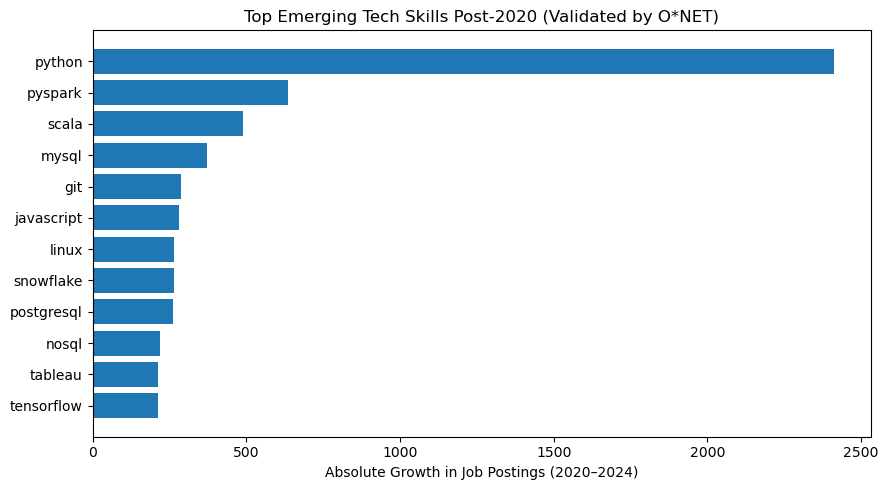

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.barh(top_tech["skill"], top_tech["abs_growth"])
plt.title("Top Emerging Tech Skills Post-2020 (Validated by O*NET)")
plt.xlabel("Absolute Growth in Job Postings (2020–2024)")
plt.ylabel("")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [1]:
from pathlib import Path
list(Path("data/raw/eurostat").glob("*"))

[WindowsPath('data/raw/eurostat/lfsa_egais.xlsx')]

In [2]:
import pandas as pd

euro = pd.read_excel("data/raw/eurostat/lfsa_egais.xlsx")
euro.shape, euro.columns

C:\Users\riose\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


((57, 21),
 Index(['Data extracted on 19/12/2025 09:59:19 from [ESTAT]', 'Unnamed: 1',
        'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
        'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
        'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
        'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
        'Unnamed: 20'],
       dtype='object'))

In [3]:
import pandas as pd

raw = pd.read_excel("data/raw/eurostat/lfsa_egais.xlsx", header=None)
raw.head(15)

C:\Users\riose\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Data extracted on 19/12/2025 09:59:19 from [ES...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dataset:,Employed persons by professional status and oc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Last updated:,11/12/2025 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Time frequency,NaN,Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Unit of measure,NaN,Thousand persons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Sex,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Age class,NaN,From 15 to 64 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Labour force and employment status,NaN,Employed persons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,International Standard Classification of Occup...,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd

# Lee usando la fila 11 como header (0-indexed => header=11)
euro_wide = pd.read_excel("data/raw/eurostat/lfsa_egais.xlsx", header=11)

# Renombra la primera columna (a veces viene como 'TIME' o 'GEO (Labels)' dependiendo de la exportación)
first_col = euro_wide.columns[0]
euro_wide = euro_wide.rename(columns={first_col: "geo"})

# Elimina columnas totalmente vacías (esas NaN intercaladas)
euro_wide = euro_wide.dropna(axis=1, how="all")

euro_wide.head(), euro_wide.shape, euro_wide.columns[:10]

C:\Users\riose\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(                                         geo      2015 Unnamed: 2      2016  \
 0                               GEO (Labels)       NaN        NaN       NaN   
 1  European Union - 27 countries (from 2020)  185728.4        NaN  188424.9   
 2       Euro area – 20 countries (from 2023)    142316        NaN  144674.3   
 3                                    Belgium    4499.3        NaN    4540.6   
 4                                   Bulgaria    2973.5        NaN    2954.3   
 
   Unnamed: 4      2017 Unnamed: 6      2018 Unnamed: 8      2019  ...  \
 0        NaN       NaN        NaN       NaN        NaN       NaN  ...   
 1        NaN  191034.9        NaN  192830.1        NaN  194795.4  ...   
 2        NaN  146520.2        NaN  148048.3        NaN  149604.5  ...   
 3        NaN    4587.2          b    4699.4        NaN    4770.7  ...   
 4        NaN    3073.4        NaN    3068.9        NaN      2946  ...   
 
        2020 Unnamed: 12      2021 Unnamed: 14      2022 Unnamed: 16    

In [5]:
# 1) sacar la fila residual
euro_wide2 = euro_wide[euro_wide["geo"] != "GEO (Labels)"].copy()

# 2) quedarnos SOLO con columnas que sean años (las "Unnamed" se van)
year_cols = [c for c in euro_wide2.columns if str(c).isdigit()]

euro_wide2 = euro_wide2[["geo"] + year_cols]

euro_wide2.head(), euro_wide2.shape, euro_wide2.columns

(                                         geo      2015      2016      2017  \
 1  European Union - 27 countries (from 2020)  185728.4  188424.9  191034.9   
 2       Euro area – 20 countries (from 2023)    142316  144674.3  146520.2   
 3                                    Belgium    4499.3    4540.6    4587.2   
 4                                   Bulgaria    2973.5    2954.3    3073.4   
 5                                    Czechia    4934.3    5015.9    5093.9   
 
        2018      2019      2020      2021      2022      2023      2024  
 1  192830.1  194795.4  191680.5    192571  196945.1  199013.1  200748.1  
 2  148048.3  149604.5  146968.5  148161.6  152122.1  154304.8  155856.1  
 3    4699.4    4770.7    4740.6    4794.7    4920.9    4954.1    4981.1  
 4    3068.9      2946    2833.4    2785.4    2840.7    2821.7    2820.8  
 5    5146.8      5151    5086.9    5066.1    5021.7    4890.3    5010.4  ,
 (45, 11),
 Index(['geo', '2015', '2016', '2017', '2018', '2019', '2020',

In [6]:
import pandas as pd

euro_long = euro_wide2.melt(
    id_vars="geo",
    var_name="year",
    value_name="employment_thousands"
)

euro_long["year"] = euro_long["year"].astype(int)

euro_long.head(), euro_long.shape

(                                         geo  year employment_thousands
 0  European Union - 27 countries (from 2020)  2015             185728.4
 1       Euro area – 20 countries (from 2023)  2015               142316
 2                                    Belgium  2015               4499.3
 3                                   Bulgaria  2015               2973.5
 4                                    Czechia  2015               4934.3,
 (450, 3))

In [7]:
euro_long["geo"].nunique(), euro_long["year"].min(), euro_long["year"].max()

(44, 2015, 2024)

In [8]:
import matplotlib.pyplot as plt

eu27 = euro_long[euro_long["geo"].str.contains("European Union - 27", na=False)].sort_values("year")
eu27

,geo,year,employment_thousands
0,European Union - 27 countries (from 2020),2015,185728.4
45,European Union - 27 countries (from 2020),2016,188424.9
90,European Union - 27 countries (from 2020),2017,191034.9
135,European Union - 27 countries (from 2020),2018,192830.1
180,European Union - 27 countries (from 2020),2019,194795.4
225,European Union - 27 countries (from 2020),2020,191680.5
270,European Union - 27 countries (from 2020),2021,192571
315,European Union - 27 countries (from 2020),2022,196945.1
360,European Union - 27 countries (from 2020),2023,199013.1
405,European Union - 27 countries (from 2020),2024,200748.1


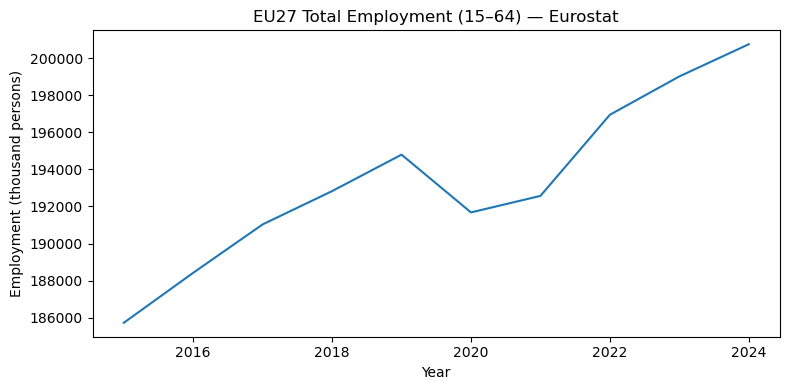

In [9]:
plt.figure(figsize=(8,4))
plt.plot(eu27["year"], eu27["employment_thousands"])
plt.title("EU27 Total Employment (15–64) — Eurostat")
plt.xlabel("Year")
plt.ylabel("Employment (thousand persons)")
plt.tight_layout()
plt.show()

In [1]:
from pathlib import Path
Path("data/raw/bls/oe/oe.data.0.Current").exists()

True

In [2]:
from pathlib import Path
Path("data/raw/bls/oe/oe.datatype").exists()

True

In [3]:
from pathlib import Path
Path("data/raw/bls/oe/oe.occupation").exists()

True

In [4]:
from pathlib import Path
Path("data/raw/bls/oe/oe.series").exists()

True

In [1]:
import pandas as pd
from pathlib import Path

base = Path("data/raw/bls/oe")

oe_data  = pd.read_csv(base/"oe.data.0.Current", sep=r"\s+", dtype={"series_id":"string"})
oe_dtype = pd.read_csv(base/"oe.datatype", sep="\t", dtype="string")
oe_occ   = pd.read_csv(base/"oe.occupation", sep="\t", dtype="string")
oe_series= pd.read_csv(base/"oe.series", sep="\t", dtype="string")

print("oe_data:", oe_data.shape)
print("oe_dtype:", oe_dtype.shape, list(oe_dtype.columns))
print("oe_occ:", oe_occ.shape, list(oe_occ.columns))
print("oe_series:", oe_series.shape, list(oe_series.columns))

oe_data.head()

oe_data: (6036958, 5)
oe_dtype: (17, 2) ['datatype_code', 'datatype_name']
oe_occ: (1105, 6) ['occupation_code', 'occupation_name', 'occupation_description', 'display_level', 'selectable', 'sort_sequence']
oe_series: (6036958, 15) ['series_id                     ', 'seasonal', 'areatype_code', 'industry_code', 'occupation_code', 'datatype_code', 'state_code', 'area_code', 'sector_code', 'series_title', 'footnote_codes', 'begin_year', 'begin_period', 'end_year', 'end_period']


,series_id,year,period,value,footnote_codes
0,OEUM001018000000000000001,2024,A01,74090,NaN
1,OEUM001018000000000000002,2024,A01,0.0,NaN
2,OEUM001018000000000000003,2024,A01,25.74,NaN
3,OEUM001018000000000000004,2024,A01,53530,NaN
4,OEUM001018000000000000005,2024,A01,0.9,NaN


In [2]:
from pathlib import Path

base = Path("data/raw/bls/oe")
p = base / "oe.series"

print("exists:", p.exists())
print("size_MB:", round(p.stat().st_size/1024/1024, 2))

# mirar las primeras 5 líneas del archivo (texto crudo)
with p.open("r", encoding="utf-8", errors="replace") as f:
    for i in range(5):
        print(f.readline().rstrip("\n"))

exists: True
size_MB: 1205.75
series_id                     	seasonal	areatype_code	industry_code	occupation_code	datatype_code	state_code	area_code	sector_code	series_title	footnote_codes	begin_year	begin_period	end_year	end_period
OEUM001018000000000000001     	U	M	000000	000000	01	48	0010180	00--01	Employment for All Occupations in All Industries in Abilene, TX	1	2024	A01	2024	A01
OEUM001018000000000000002     	U	M	000000	000000	02	48	0010180	00--01	Employment percent relative standard error for All Occupations in All Industries in Abilene, TX	3	2024	A01	2024	A01
OEUM001018000000000000003     	U	M	000000	000000	03	48	0010180	00--01	Hourly mean wage for All Occupations in All Industries in Abilene, TX		2024	A01	2024	A01
OEUM001018000000000000004     	U	M	000000	000000	04	48	0010180	00--01	Annual mean wage for All Occupations in All Industries in Abilene, TX	2	2024	A01	2024	A01


In [4]:
import pandas as pd
from pathlib import Path

base = Path("data/raw/bls/oe")

tmp = pd.read_csv(
    base / "oe.series",
    sep="\t",
    nrows=5,
    dtype="string"
)

tmp.columns

Index(['series_id                     ', 'seasonal', 'areatype_code',
       'industry_code', 'occupation_code', 'datatype_code', 'state_code',
       'area_code', 'sector_code', 'series_title', 'footnote_codes',
       'begin_year', 'begin_period', 'end_year', 'end_period'],
      dtype='object')

In [7]:
# Normalizamos nombres de columnas (quitamos espacios)
series = pd.read_csv(
    base / "oe.series",
    sep="\t",
    dtype="string"
)

series.columns = series.columns.str.strip()

series.columns

Index(['series_id', 'seasonal', 'areatype_code', 'industry_code',
       'occupation_code', 'datatype_code', 'state_code', 'area_code',
       'sector_code', 'series_title', 'footnote_codes', 'begin_year',
       'begin_period', 'end_year', 'end_period'],
      dtype='object')

In [8]:
usecols = [
    "series_id",
    "areatype_code",
    "industry_code",
    "occupation_code",
    "datatype_code",
    "state_code",
    "area_code",
    "series_title",
    "begin_year",
    "end_year"
]

series_small = series[usecols].copy()

series_small.shape

(6036958, 10)

In [9]:
# Filtro US National
series_nat = series_small[
    series_small["areatype_code"] == "N"
].copy()

print("series_nat shape:", series_nat.shape)
series_nat.head(10)

series_nat shape: (2021745, 10)


,series_id,areatype_code,industry_code,occupation_code,datatype_code,state_code,area_code,series_title,begin_year,end_year
3375860,OEUN000000000000000000001,N,000000,000000,01,00,0000000,Employment for All Occupations in All Industri...,2024,2024
3375861,OEUN000000000000000000002,N,000000,000000,02,00,0000000,Employment percent relative standard error for...,2024,2024
3375862,OEUN000000000000000000003,N,000000,000000,03,00,0000000,Hourly mean wage for All Occupations in All In...,2024,2024
3375863,OEUN000000000000000000004,N,000000,000000,04,00,0000000,Annual mean wage for All Occupations in All In...,2024,2024
3375864,OEUN000000000000000000005,N,000000,000000,05,00,0000000,Wage percent relative standard error for All O...,2024,2024
3375865,OEUN000000000000000000006,N,000000,000000,06,00,0000000,Hourly 10th percentile wage for All Occupation...,2024,2024
3375866,OEUN000000000000000000007,N,000000,000000,07,00,0000000,Hourly 25th percentile wage for All Occupation...,2024,2024
3375867,OEUN000000000000000000008,N,000000,000000,08,00,0000000,Hourly median wage for All Occupations in All ...,2024,2024
3375868,OEUN000000000000000000009,N,000000,000000,09,00,0000000,Hourly 75th percentile wage for All Occupation...,2024,2024
3375869,OEUN000000000000000000010,N,000000,000000,10,00,0000000,Hourly 90th percentile wage for All Occupation...,2024,2024


In [10]:
series_core = series_nat[
    (series_nat["industry_code"] == "000000") &
    (series_nat["occupation_code"] == "000000") &
    (series_nat["datatype_code"].isin(["01", "04"]))
].copy()

print("series_core shape:", series_core.shape)
series_core

series_core shape: (2, 10)


,series_id,areatype_code,industry_code,occupation_code,datatype_code,state_code,area_code,series_title,begin_year,end_year
3375860,OEUN000000000000000000001,N,000000,000000,01,00,0000000,Employment for All Occupations in All Industri...,2024,2024
3375863,OEUN000000000000000000004,N,000000,000000,04,00,0000000,Annual mean wage for All Occupations in All In...,2024,2024


In [11]:
# Series IDs que nos interesan
target_series = series_core["series_id"].tolist()
target_series

['OEUN000000000000000000001     ', 'OEUN000000000000000000004     ']

In [12]:
oe_values = pd.read_csv(
    base / "oe.data.0.Current",
    sep=r"\s+",
    dtype={"series_id": "string"},
    usecols=["series_id", "year", "period", "value"],
)

oe_values = oe_values[
    oe_values["series_id"].isin(target_series)
].copy()

print("oe_values shape:", oe_values.shape)
oe_values.head(10)

oe_values shape: (0, 4)


,series_id,year,period,value


In [13]:
# Normalizar series_id en series_core
series_core["series_id"] = series_core["series_id"].str.strip()

# Volver a definir target_series
target_series = series_core["series_id"].tolist()
target_series

['OEUN000000000000000000001', 'OEUN000000000000000000004']

In [14]:
oe_values = pd.read_csv(
    base / "oe.data.0.Current",
    sep=r"\s+",
    dtype={"series_id": "string"},
    usecols=["series_id", "year", "period", "value"],
)

# Normalizar series_id en oe_values
oe_values["series_id"] = oe_values["series_id"].str.strip()

# Filtrar
oe_values = oe_values[
    oe_values["series_id"].isin(target_series)
].copy()

print("oe_values shape:", oe_values.shape)
oe_values.head(10)

oe_values shape: (2, 4)


,series_id,year,period,value
3375860,OEUN000000000000000000001,2024,A01,154187380
3375863,OEUN000000000000000000004,2024,A01,67920


In [15]:
# Pasar value a numérico
oe_values["value"] = pd.to_numeric(oe_values["value"], errors="coerce")

# Pivotar a formato limpio
bls_summary = oe_values.pivot(
    index="year",
    columns="series_id",
    values="value"
).reset_index()

bls_summary

series_id,year,OEUN000000000000000000001,OEUN000000000000000000004
0,2024,154187380,67920


In [16]:
from pathlib import Path

onet_path = Path("data/raw/onet")
list(onet_path.glob("*")) if onet_path.exists() else "No existe data/raw/onet"

[WindowsPath('data/raw/onet/db_30_1_text'),
 WindowsPath('data/raw/onet/db_30_1_text.zip')]

In [17]:
from pathlib import Path

onet_dir = Path("data/raw/onet/db_30_1_text")
sorted([p.name for p in onet_dir.glob("*.txt")])

['Abilities to Work Activities.txt',
 'Abilities to Work Context.txt',
 'Abilities.txt',
 'Alternate Titles.txt',
 'Basic Interests to RIASEC.txt',
 'Content Model Reference.txt',
 'DWA Reference.txt',
 'Education, Training, and Experience Categories.txt',
 'Education, Training, and Experience.txt',
 'Emerging Tasks.txt',
 'IWA Reference.txt',
 'Interests Illustrative Activities.txt',
 'Interests Illustrative Occupations.txt',
 'Interests.txt',
 'Job Zone Reference.txt',
 'Job Zones.txt',
 'Knowledge.txt',
 'Level Scale Anchors.txt',
 'Occupation Data.txt',
 'Occupation Level Metadata.txt',
 'RIASEC Keywords.txt',
 'Read Me.txt',
 'Related Occupations.txt',
 'Sample of Reported Titles.txt',
 'Scales Reference.txt',
 'Skills to Work Activities.txt',
 'Skills to Work Context.txt',
 'Skills.txt',
 'Survey Booklet Locations.txt',
 'Task Categories.txt',
 'Task Ratings.txt',
 'Task Statements.txt',
 'Tasks to DWAs.txt',
 'Technology Skills.txt',
 'Tools Used.txt',
 'UNSPSC Reference.txt',
 

In [18]:
import pandas as pd
from pathlib import Path

skills_path = Path("data/raw/onet/db_30_1_text/Skills.txt")

onet_skills = pd.read_csv(
    skills_path,
    sep="\t",
    dtype="string"
)

onet_skills.shape, onet_skills.columns

((62580, 13),
 Index(['O*NET-SOC Code', 'Element ID', 'Element Name', 'Scale ID',
        'Data Value', 'N', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound',
        'Recommend Suppress', 'Not Relevant', 'Date', 'Domain Source'],
       dtype='object'))

In [19]:
onet_skills.head(3)

,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,2.A.1.a,Reading Comprehension,IM,4.12,8,0.1250,3.8800,4.3700,N,<NA>,08/2023,Analyst
1,11-1011.00,2.A.1.a,Reading Comprehension,LV,4.62,8,0.1830,4.2664,4.9836,N,N,08/2023,Analyst
2,11-1011.00,2.A.1.b,Active Listening,IM,4.00,8,0.0000,4.0000,4.0000,N,<NA>,08/2023,Analyst


In [20]:
onet_skills.tail(3)

,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
62577,53-7121.00,2.B.5.c,Management of Material Resources,LV,1.88,8,0.1250,1.6300,2.1200,N,N,08/2019,Analyst
62578,53-7121.00,2.B.5.d,Management of Personnel Resources,IM,2.88,8,0.1250,2.6300,3.1200,N,<NA>,08/2019,Analyst
62579,53-7121.00,2.B.5.d,Management of Personnel Resources,LV,2.75,8,0.1637,2.4292,3.0708,N,N,08/2019,Analyst


In [21]:
onet_skills.isna().mean().sort_values(ascending=False)

Not Relevant          0.5
Element ID            0.0
Element Name          0.0
Scale ID              0.0
O*NET-SOC Code        0.0
Data Value            0.0
N                     0.0
Lower CI Bound        0.0
Standard Error        0.0
Upper CI Bound        0.0
Recommend Suppress    0.0
Date                  0.0
Domain Source         0.0
dtype: float64

In [22]:
onet_skills['Recommend Suppress'].value_counts(dropna=False)
onet_skills['Not Relevant'].value_counts(dropna=False)

Not Relevant
<NA>    31290
N       27907
Y        3383
Name: count, dtype: Int64

In [23]:
onet_skills.nunique().sort_values(ascending=False)

O*NET-SOC Code        894
Upper CI Bound        329
Lower CI Bound        304
Standard Error         56
Data Value             49
Element ID             35
Element Name           35
Date                   16
Scale ID                2
Not Relevant            2
Recommend Suppress      2
N                       1
Domain Source           1
dtype: int64

In [24]:
onet_skills.groupby(
    ['O*NET-SOC Code', 'Element ID', 'Scale ID']
).size().value_counts().head(10)

1    62580
Name: count, dtype: int64

In [25]:
onet_skills["Scale ID"].value_counts(dropna=False)

Scale ID
IM    31290
LV    31290
Name: count, dtype: Int64

In [26]:
onet_skills.groupby("Scale ID")[["Data Value", "N"]].describe()

Data Value                         N                  
              count unique   top  freq  count unique top   freq
Scale ID                                                       
IM            31290     33  3.00  3132  31290      1   8  31290
LV            31290     49  3.00  2815  31290      1   8  31290

In [27]:
(
    onet_skills
    .groupby("Scale ID")
    .nunique()
    .T
)

Scale ID,IM,LV
O*NET-SOC Code,894,894
Element ID,35,35
Element Name,35,35
Data Value,33,49
N,1,1
Standard Error,28,56
Lower CI Bound,122,301
Upper CI Bound,131,326
Recommend Suppress,1,2
Not Relevant,0,2


In [28]:
base_cols = ["O*NET-SOC Code", "Element ID", "Element Name"]

(
    onet_skills
    .groupby(["Scale ID"] + base_cols)
    .size()
    .value_counts()
)

1    62580
Name: count, dtype: int64

In [29]:
im = onet_skills[onet_skills["Scale ID"] == "IM"].copy()
lv = onet_skills[onet_skills["Scale ID"] == "LV"].copy()

im.shape, lv.shape

((31290, 13), (31290, 13))

In [30]:
(
    im
    .sort_values(["O*NET-SOC Code", "Element ID"])
    [["O*NET-SOC Code", "Element ID"]]
    .reset_index(drop=True)
    .equals(
        lv
        .sort_values(["O*NET-SOC Code", "Element ID"])
        [["O*NET-SOC Code", "Element ID"]]
        .reset_index(drop=True)
    )
)

True

In [31]:
skills_onet = im.copy()
skills_onet.shape

(31290, 13)

In [32]:
skills_onet.columns

Index(['O*NET-SOC Code', 'Element ID', 'Element Name', 'Scale ID',
       'Data Value', 'N', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound',
       'Recommend Suppress', 'Not Relevant', 'Date', 'Domain Source'],
      dtype='object')

In [33]:
skills_onet.nunique().sort_values()

Not Relevant            0
Scale ID                1
Recommend Suppress      1
N                       1
Domain Source           1
Date                   16
Standard Error         28
Data Value             33
Element Name           35
Element ID             35
Lower CI Bound        122
Upper CI Bound        131
O*NET-SOC Code        894
dtype: int64

In [34]:
cols_min = [
    "O*NET-SOC Code",
    "Element ID",
    "Element Name",
    "Data Value",
    "Standard Error",
    "Lower CI Bound",
    "Upper CI Bound",
    "Date",
]

skills_onet_min = skills_onet[cols_min].copy()
skills_onet_min.shape

(31290, 8)

In [35]:
skills_onet_min.duplicated(
    subset=["O*NET-SOC Code", "Element ID"]
).sum()

np.int64(0)

In [36]:
skills_onet_min["Element Name"].head(20)

0       Reading Comprehension
2            Active Listening
4                     Writing
6                    Speaking
8                 Mathematics
10                    Science
12          Critical Thinking
14            Active Learning
16        Learning Strategies
18                 Monitoring
20      Social Perceptiveness
22               Coordination
24                 Persuasion
26                Negotiation
28                Instructing
30        Service Orientation
32    Complex Problem Solving
34        Operations Analysis
36          Technology Design
38        Equipment Selection
Name: Element Name, dtype: string

In [37]:
onet_skill_catalog = (
    skills_onet_min[["Element ID", "Element Name"]]
    .drop_duplicates()
    .sort_values("Element Name")
    .reset_index(drop=True)
)

onet_skill_catalog.shape, onet_skill_catalog.head(10)

((35, 2),
   Element ID                  Element Name
 0    2.A.2.b               Active Learning
 1    2.A.1.b              Active Listening
 2    2.B.2.i       Complex Problem Solving
 3    2.B.1.b                  Coordination
 4    2.A.2.a             Critical Thinking
 5    2.B.3.j         Equipment Maintenance
 6    2.B.3.c           Equipment Selection
 7    2.B.3.d                  Installation
 8    2.B.1.e                   Instructing
 9    2.B.4.e  Judgment and Decision Making)

In [39]:
"skills_onet_min" in globals(), "onet_skill_catalog" in globals()

(True, True)

In [40]:
[k for k in globals().keys() if not k.startswith("_")]

['In',
 'Out',
 'get_ipython',
 'exit',
 'quit',
 'open',
 'json',
 'sys',
 'islice',
 'collections',
 'NamespaceMagics',
 'pd',
 'Path',
 'base',
 'oe_data',
 'oe_dtype',
 'oe_occ',
 'oe_series',
 'getpass',
 'hashlib',
 'import_pandas_safely',
 'is_data_frame',
 'dataframe_columns',
 'dtypes_str',
 'dataframe_hash',
 'get_dataframes',
 'p',
 'f',
 'i',
 'usecols',
 'tmp',
 'series',
 'series_small',
 'series_nat',
 'series_core',
 'target_series',
 'oe_values',
 'bls_summary',
 'onet_path',
 'onet_dir',
 'skills_path',
 'onet_skills',
 'base_cols',
 'im',
 'lv',
 'skills_onet',
 'cols_min',
 'skills_onet_min',
 'onet_skill_catalog']

In [41]:
from pathlib import Path

sorted([p.name for p in Path(".").glob("*.csv")])

['cagr_2020_2024.csv',
 'growth_2020_2024.csv',
 'naukri_data_scientist.csv',
 'pivot_2020_2024.csv',
 'summary_skills_2015_2024.csv']

In [42]:
pd.read_csv("naukri_data_scientist.csv").shape, pd.read_csv("naukri_data_scientist.csv").columns

((13691, 40),
 Index(['ambitionBoxData/AggregateRating', 'ambitionBoxData/ReviewsCount',
        'ambitionBoxData/Title', 'ambitionBoxData/Url', 'board',
        'brandingTags/0/id', 'brandingTags/0/label', 'clientCareersUrl',
        'clientGroupId', 'clientHeadline', 'clientLogo', 'companyId',
        'companyJobsUrl', 'companyName', 'consultant', 'createdDate',
        'currency', 'exclusive', 'experience', 'footerPlaceholderColor',
        'footerPlaceholderLabel', 'groupId', 'hideClientName', 'hiringFor',
        'isSaved', 'isTopGroup', 'jdURL', 'jobDescription', 'jobId', 'jobType',
        'location', 'logoPath', 'logoPathV3', 'mode', 'salary',
        'showMultipleApply', 'smbJobFields/gender', 'tagsAndSkills', 'title',
        'vacancy'],
       dtype='object'))

In [43]:
skills_demand_raw = naukri = pd.read_csv(
    "naukri_data_scientist.csv",
    usecols=["jobId", "createdDate", "tagsAndSkills"]
)

skills_demand_raw.shape, skills_demand_raw.head(3)

((13691, 3),
            createdDate         jobId  \
 0  2024-12-23 06:51:32   10421006391   
 1  2024-12-23 06:33:58  231224903546   
 2  2024-12-23 09:29:16  231224006929   
 
                                        tagsAndSkills  
 0  Natural Language Processing,Phd,Deep Learning,...  
 1  Data Science,Tensorflow,StatModel,SAS,Go,Rando...  
 2  cuda,python,github,natural language processing...  )